## Library

In [3]:
import os
import mysql.connector as MariaDB
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

## DB Connection

In [4]:
user = os.environ.get('USER')
pw = os.environ.get('PASSWORD')

In [5]:
con = MariaDB.connect(
    host="127.0.0.1",
    user=user,
    passwd=pw,
    db="DB_TEST",
    port=3306
)

## Statistics Table

In [6]:
table = pd.read_sql("SELECT * FROM round_statistics", con)
table

,id,quantity,operator_total_time,function_total_time,operator
0,1,100000,2.25434,2.06976,generator
1,1,100000,1.13473,1.12578,import
2,2,100000,2.24580,2.16269,generator
3,2,100000,1.30031,1.29059,import
4,3,100000,2.29175,2.21514,generator
...,...,...,...,...,...
95,48,100000,1.21628,1.20062,import
96,49,100000,3.31473,3.24375,generator
97,49,100000,1.10046,1.09119,import
98,50,100000,3.26435,3.20459,generator


In [7]:
all_process = table.groupby("id").sum().rename(columns={"operator_total_time": "tempo_total_operador", "function_total_time": "tempo_total_função"})
all_process.head()

,quantity,tempo_total_operador,tempo_total_função
id,,,
1,200000,3.38907,3.19554
2,200000,3.54611,3.45328
3,200000,3.51774,3.43227
4,200000,3.42354,3.35054
5,200000,3.47922,3.41081


In [8]:
df1 = pd.DataFrame(data=table[["id", "operator_total_time", "operator"]].rename(columns={"operator_total_time":"time"}))
df1["obs"] = "tempo_total_operador"
df2 = pd.DataFrame(data=table[["id", "function_total_time", "operator"]].rename(columns={"function_total_time":"time"}))
df2["obs"] = "tempo_total_função"
df = pd.concat([df1, df2], ignore_index=True)
df

,id,time,operator,obs
0,1,2.25434,generator,tempo_total_operador
1,1,1.13473,import,tempo_total_operador
2,2,2.24580,generator,tempo_total_operador
3,2,1.30031,import,tempo_total_operador
4,3,2.29175,generator,tempo_total_operador
...,...,...,...,...
195,48,1.20062,import,tempo_total_função
196,49,3.24375,generator,tempo_total_função
197,49,1.09119,import,tempo_total_função
198,50,3.20459,generator,tempo_total_função


In [9]:
path_imgs = join(
    str(Path(os.path.abspath('')).parents[0]),
    "imgs",
    "{filename}"
    )
sns.set_style("whitegrid")

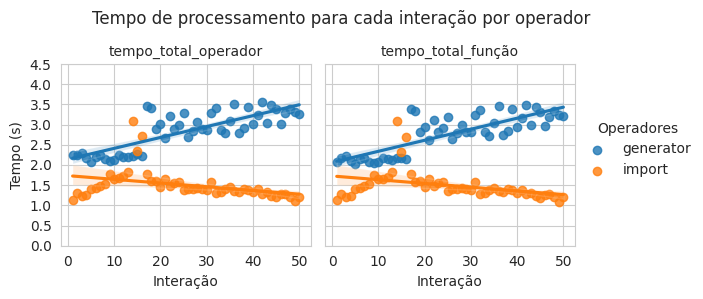

In [33]:
grid = sns.FacetGrid(df.rename(columns={"operator": "Operadores"}), col="obs", hue="Operadores", despine=False)
grid.map(sns.regplot, "id", "time")
grid.set_axis_labels("Interação", "Tempo (s)")
grid.set_titles(col_template="{col_name}")
grid.set(yticks=[0,0.5, 1,1.5,2,2.5,3,3.5,4,4.5], xticks=[0, 10, 20, 30, 40, 50])
grid.add_legend()
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle('Tempo de processamento para cada interação por operador', fontsize=12)
plt.show()
grid.savefig(path_imgs.format(filename="per_operator.png"), format="png", dpi=grid.fig.dpi)

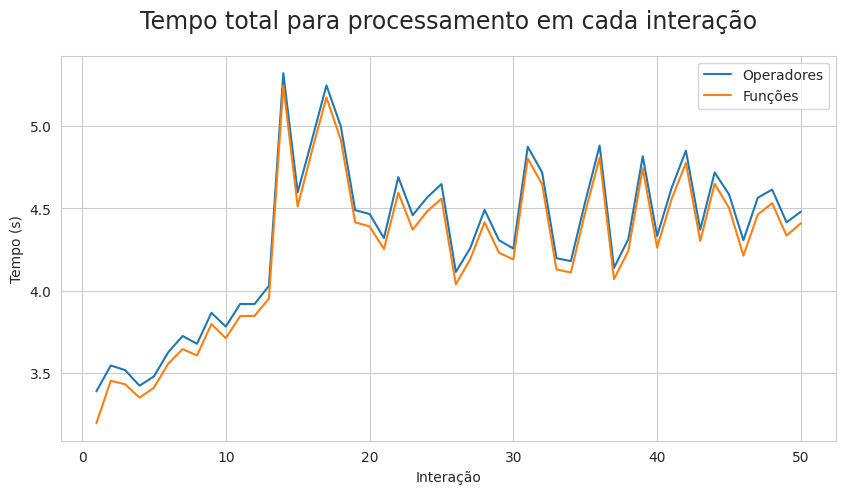

In [32]:
fig, axes = plt.subplots(figsize=(10,5))
sns.lineplot(ax=axes, x="id", y="tempo_total_operador", data=all_process)
sns.lineplot(ax=axes, x="id", y="tempo_total_função", data=all_process)
axes.set_title("Tempo total para processamento em cada interação", fontsize="17", y=1.05)
axes.set(ylabel="Tempo (s)", xlabel="Interação")
plt.legend(labels=["Operadores","Funções"])
plt.show()
fig.savefig(path_imgs.format(filename="total_processing.png"), dpi=fig.dpi, format="png")